<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-deep-learning/blob/main/main_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ultralytics
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image
import numpy as np

In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

In [40]:
model = YOLO('/content/object.pt')  # Path ke model deteksi

In [41]:
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

Saving caries-79-_png.rf.6b54537890de547a5b8498378d3a96e0.jpg to caries-79-_png.rf.6b54537890de547a5b8498378d3a96e0 (3).jpg


In [46]:
# Jalankan deteksi
results = model(img_path)

# Ambil hasil bounding box
boxes = results[0].boxes.xyxy.cpu().numpy()


image 1/1 /content/caries-79-_png.rf.6b54537890de547a5b8498378d3a96e0 (3).jpg: 640x640 3 tooths, 218.7ms
Speed: 7.3ms preprocess, 218.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



image 1/1 /content/caries-79-_png.rf.6b54537890de547a5b8498378d3a96e0 (3).jpg: 640x640 3 tooths, 224.6ms
Speed: 4.7ms preprocess, 224.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


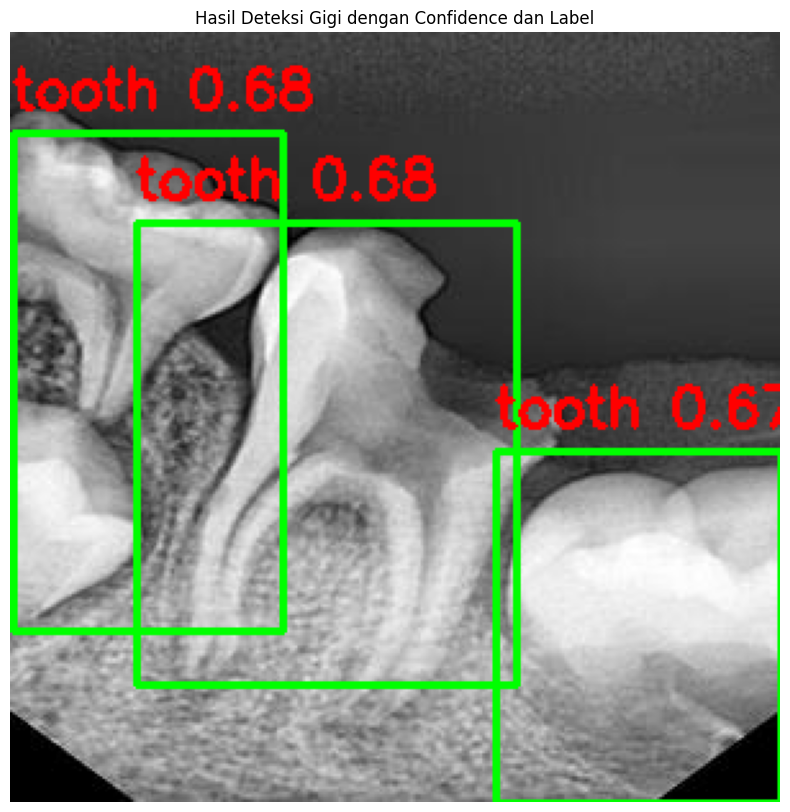

In [44]:
import cv2
import matplotlib.pyplot as plt

# Ambil deteksi dari YOLO
results = model(img_path)  # pastikan ini sudah dijalankan sebelumnya
boxes = results[0].boxes

# Ekstrak info dari hasil deteksi
xyxy = boxes.xyxy.cpu().numpy()         # bounding boxes
confs = boxes.conf.cpu().numpy()        # confidence scores
class_ids = boxes.cls.cpu().numpy()     # class index
class_names = model.names               # nama kelas

# Baca gambar asli
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gambar bounding box, confidence, dan nama kelas
for i in range(len(xyxy)):
    x1, y1, x2, y2 = map(int, xyxy[i])
    conf = confs[i]
    cls_id = int(class_ids[i])
    label = f'{class_names[cls_id]} {conf:.2f}'

    # Gambar box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Tampilkan label di atas box
    cv2.putText(image, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Hasil Deteksi Gigi dengan Confidence dan Label")
plt.show()

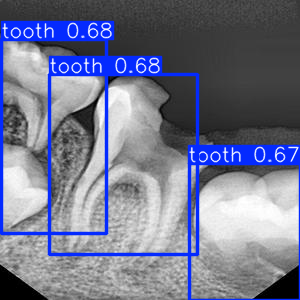

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0.])
conf: tensor([0.6811, 0.6800, 0.6737])
data: tensor([[ 49.2179,  74.5986, 197.8887, 254.7112,   0.6811,   0.0000],
        [  1.2448,  39.7226, 106.5685, 233.4231,   0.6800,   0.0000],
        [189.1301, 163.9297, 300.0000, 300.0000,   0.6737,   0.0000]])
id: None
is_track: False
orig_shape: (300, 300)
shape: torch.Size([3, 6])
xywh: tensor([[123.5533, 164.6549, 148.6708, 180.1127],
        [ 53.9067, 136.5728, 105.3237, 193.7005],
        [244.5650, 231.9649, 110.8699, 136.0703]])
xywhn: tensor([[0.4118, 0.5488, 0.4956, 0.6004],
        [0.1797, 0.4552, 0.3511, 0.6457],
        [0.8152, 0.7732, 0.3696, 0.4536]])
xyxy: tensor([[ 49.2179,  74.5986, 197.8887, 254.7112],
        [  1.2448,  39.7226, 106.5685, 233.4231],
        [189.1301, 163.9297, 300.0000, 300.0000]])
xyxyn: tensor([[0.1641, 0.2487, 0.6596, 0.8490],
        [0.0041, 0.1324, 0.3552, 0.7781],
        [0.6304, 0.5464, 1.0000, 1.0000]])


In [45]:
results[0].show()  # Menampilkan prediksi langsung
print(results[0].boxes)  # Apakah ada box?

Saving caries-79-_png.rf.6b54537890de547a5b8498378d3a96e0.jpg to caries-79-_png.rf.6b54537890de547a5b8498378d3a96e0 (6).jpg

0: 640x640 3 tooths, 207.5ms
Speed: 5.3ms preprocess, 207.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/temp_tooth.jpg: 640x640 noncaries 0.94, caries_profunda 0.05, caries_media 0.00, caries_superficial 0.00, 95.5ms
Speed: 16.2ms preprocess, 95.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/temp_tooth.jpg: 640x640 noncaries 1.00, caries_media 0.00, caries_profunda 0.00, caries_superficial 0.00, 93.7ms
Speed: 14.0ms preprocess, 93.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/temp_tooth.jpg: 640x640 noncaries 0.99, caries_profunda 0.00, caries_media 0.00, caries_superficial 0.00, 90.3ms
Speed: 12.9ms preprocess, 90.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


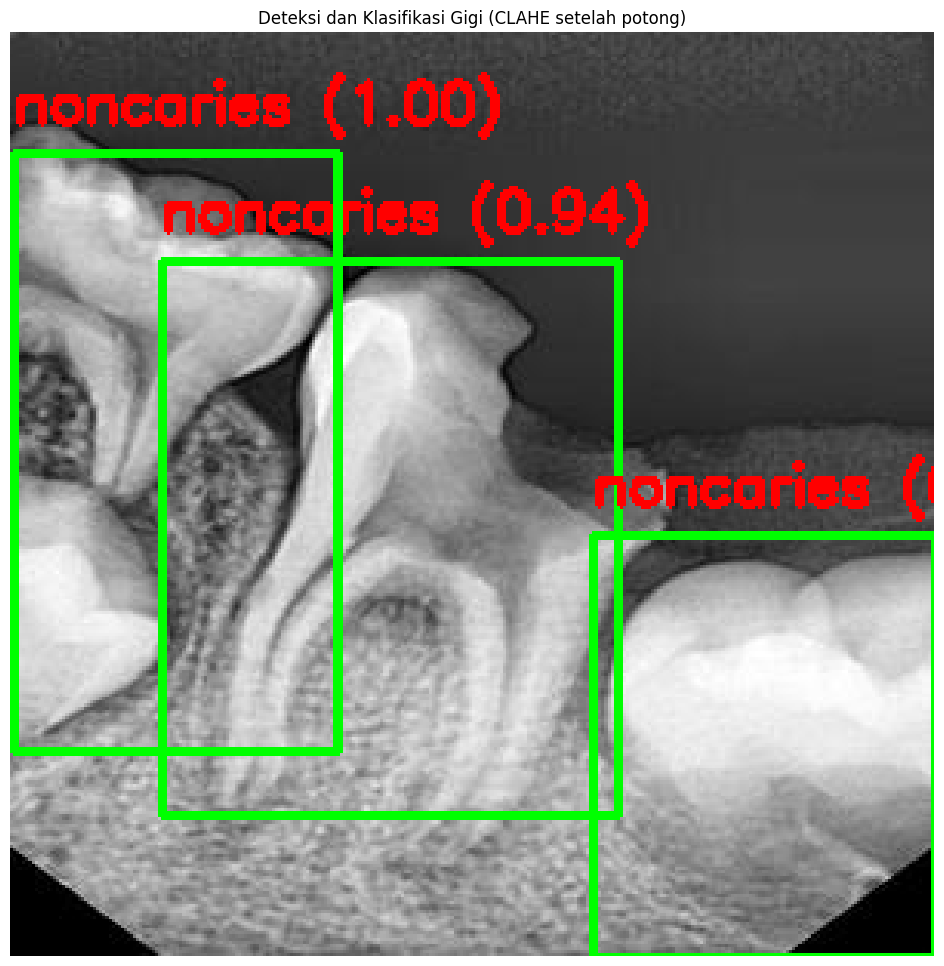

In [49]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1️⃣ Load model deteksi dan klasifikasi
det_model = YOLO('/content/object.pt')
cls_model = YOLO('/content/classification.pt')

# 2️⃣ Upload gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# 3️⃣ Baca gambar RGB
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 4️⃣ Deteksi objek (gigi)
det_results = det_model(image_rgb)
boxes = det_results[0].boxes
xyxy = boxes.xyxy.cpu().numpy()
confs = boxes.conf.cpu().numpy()

# 5️⃣ Loop setiap gigi terdeteksi
for i in range(len(xyxy)):
    x1, y1, x2, y2 = map(int, xyxy[i])
    conf = confs[i]

    # Potong gigi
    tooth_crop = image_rgb[y1:y2, x1:x2]

    # Konversi ke grayscale lalu terapkan CLAHE
    gray = cv2.cvtColor(tooth_crop, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)

    # Simpan & resize
    resized_tooth = cv2.resize(enhanced_rgb, (224, 224))
    cv2.imwrite("temp_tooth.jpg", cv2.cvtColor(resized_tooth, cv2.COLOR_RGB2BGR))

    # Klasifikasi gigi
    cls_results = cls_model("temp_tooth.jpg")
    pred_cls = int(cls_results[0].probs.top1)
    pred_conf = float(cls_results[0].probs.top1conf)
    label = cls_model.names[pred_cls]

    # Gambar bounding box & label
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    label_text = f"{label} ({pred_conf:.2f})"
    cv2.putText(image_rgb, label_text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# 6️⃣ Tampilkan hasil akhir
plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Deteksi dan Klasifikasi Gigi (CLAHE setelah potong)")
plt.show()

Saving caries-64-_png.rf.fb1b47feb61b373d94bc5ddd5a68b283.jpg to caries-64-_png.rf.fb1b47feb61b373d94bc5ddd5a68b283.jpg

0: 640x640 3 tooths, 202.3ms
Speed: 4.4ms preprocess, 202.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/tooth_0.jpg: 640x640 noncaries 1.00, caries_profunda 0.00, caries_media 0.00, caries_superficial 0.00, 96.8ms
Speed: 17.2ms preprocess, 96.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


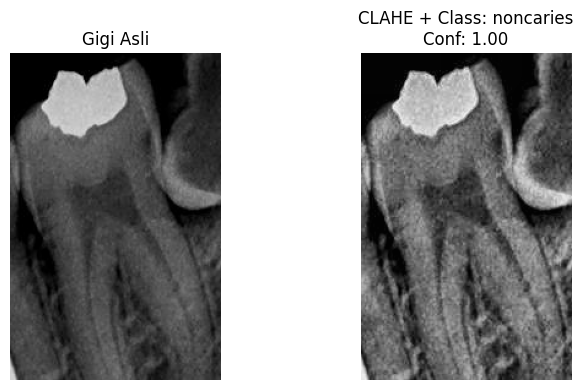


image 1/1 /content/tooth_1.jpg: 640x640 noncaries 0.98, caries_profunda 0.01, caries_media 0.00, caries_superficial 0.00, 100.3ms
Speed: 42.4ms preprocess, 100.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


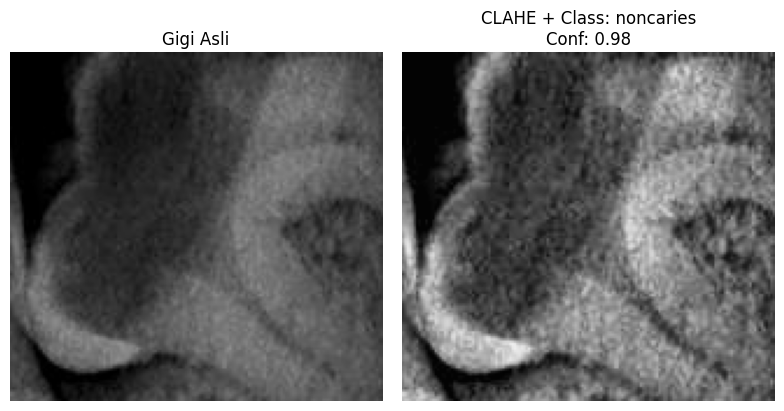


image 1/1 /content/tooth_2.jpg: 640x640 noncaries 1.00, caries_superficial 0.00, caries_media 0.00, caries_profunda 0.00, 115.1ms
Speed: 18.6ms preprocess, 115.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


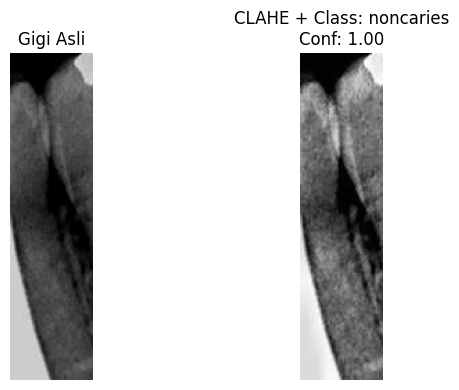

In [52]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1️⃣ Load model deteksi dan klasifikasi
det_model = YOLO('/content/object.pt')
cls_model = YOLO('/content/classification.pt')

# 2️⃣ Upload gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# 3️⃣ Baca gambar
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 4️⃣ Deteksi objek (gigi)
det_results = det_model(image_rgb)
boxes = det_results[0].boxes
xyxy = boxes.xyxy.cpu().numpy()
confs = boxes.conf.cpu().numpy()

# 5️⃣ Loop setiap gigi
for i, box in enumerate(xyxy):
    x1, y1, x2, y2 = map(int, box)
    conf = confs[i]

    # Potong gigi dari gambar
    tooth_crop = image_rgb[y1:y2, x1:x2]

    # Terapkan CLAHE
    gray = cv2.cvtColor(tooth_crop, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)

    # Simpan sementara dan resize
    resized = cv2.resize(enhanced_rgb, (224, 224))
    save_path = f"tooth_{i}.jpg"
    cv2.imwrite(save_path, cv2.cvtColor(resized, cv2.COLOR_RGB2BGR))

    # 6️⃣ Klasifikasi
    cls_results = cls_model(save_path)
    top_class = int(cls_results[0].probs.top1)
    confidence = float(cls_results[0].probs.top1conf)
    label = cls_model.names[top_class]

    # 7️⃣ Tampilkan gigi asli, CLAHE, dan label
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(tooth_crop)
    axs[0].axis('off')
    axs[0].set_title("Gigi Asli")

    axs[1].imshow(enhanced_rgb)
    axs[1].axis('off')
    axs[1].set_title(f"CLAHE + Class: {label}\nConf: {confidence:.2f}")

    plt.tight_layout()
    plt.show()